<a href="https://colab.research.google.com/github/SebLynch5/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounts the drive and unzips cw_data. delete the zip file after unzipping.
from google.colab import drive
drive.mount('/content/drive')
!pwd
import os
os.chdir('/content/drive/MyDrive')
!pwd
!unzip '/content/drive/MyDrive/cw_data.zip'

Mounted at /content/drive
/content
/content/drive/MyDrive
Archive:  /content/drive/MyDrive/cw_data.zip
replace imageset/val/n03028079/ILSVRC2012_val_00019711.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace imageset/val/n03888257/ILSVRC2012_val_00024340.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace imageset/val/n03028079/ILSVRC2012_val_00007400.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace imageset/val/n03888257/ILSVRC2012_val_00032482.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# copies train images into colab. takes 5-6 mins.
from tensorflow.keras.utils import image_dataset_from_directory
BATCH_SIZE = 32
IMG_SIZE = (128, 128)
!cp -r "/content/drive/MyDrive/imageset/train" "/content/train"
train_dir = "/content/train"
train_dataset = image_dataset_from_directory(train_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 9469 files belonging to 10 classes.


In [ ]:
# copies test images into colab. takes 1-2 mins.
from tensorflow.keras.utils import image_dataset_from_directory
BATCH_SIZE = 32
IMG_SIZE = (128, 128)
!cp -r "/content/drive/MyDrive/imageset/val" "/content/test"
test_dir = "/content/test"
test_dataset = image_dataset_from_directory(test_dir,shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 3925 files belonging to 10 classes.


['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


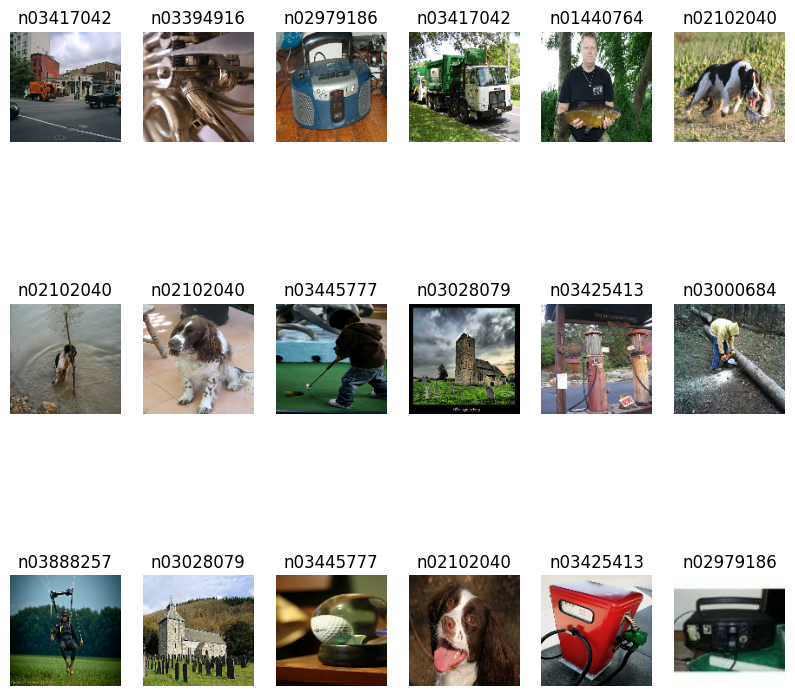

In [ ]:
# displays some labelled images from the training dataset.
import matplotlib.pyplot as plt
import tensorflow as tf
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(18):
    ax = plt.subplot(3, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[(labels[i])])
    plt.axis("off")

{0: 'n03445777', 1: 'n02102040', 2: 'n01440764', 3: 'n03028079', 4: 'n03394916', 5: 'n03888257', 6: 'n03417042', 7: 'n03425413', 8: 'n02979186', 9: 'n03000684'}
Accuracy: 40.64%


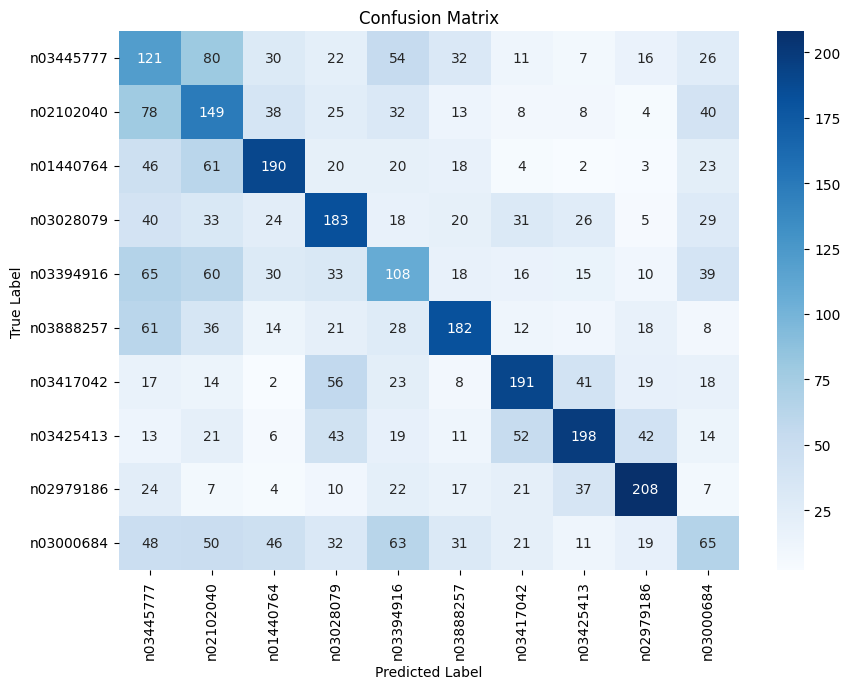

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.30      0.27       399
           1       0.29      0.38      0.33       395
           2       0.49      0.49      0.49       387
           3       0.41      0.45      0.43       409
           4       0.28      0.27      0.28       394
           5       0.52      0.47      0.49       390
           6       0.52      0.49      0.51       389
           7       0.56      0.47      0.51       419
           8       0.60      0.58      0.59       357
           9       0.24      0.17      0.20       386

    accuracy                           0.41      3925
   macro avg       0.42      0.41      0.41      3925
weighted avg       0.41      0.41      0.41      3925



In [ ]:
# svm. takes 4-5 mins. linear kernel.
import os
import numpy as np
import cv2
from sklearn import datasets
from sklearn.svm import SVC
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# function to apply histogram of gradients (HOG)
def load_images_and_labels(image_dir):
    images = []
    labels = []
    label_map = {}

    for label, class_name in enumerate(os.listdir(image_dir)):
        class_dir = os.path.join(image_dir, class_name)
        if os.path.isdir(class_dir):
            label_map[label] = class_name
            for img_name in os.listdir(class_dir): # Preprocessing for HOG
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (64, 64))
                fd, _ = hog(img_resized, # Applying HOG
                            orientations=9,
                            pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2),
                            visualize=True)
                images.append(fd)
                labels.append(label)

    return np.array(images), np.array(labels), label_map

# Applying the HOG function to train and test images
X_train, y_train, label_map = load_images_and_labels(train_dir)
X_test, y_test, _ = load_images_and_labels(test_dir)

# Normalising the feature vectors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(label_map)

# Create and train the SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predictions of the test set
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

Label mapping: {0: 'n03445777', 1: 'n02102040', 2: 'n01440764', 3: 'n03028079', 4: 'n03394916', 5: 'n03888257', 6: 'n03417042', 7: 'n03425413', 8: 'n02979186', 9: 'n03000684'}
Fitting 2 folds for each of 15 candidates, totalling 30 fits
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Test Accuracy: 54.34%


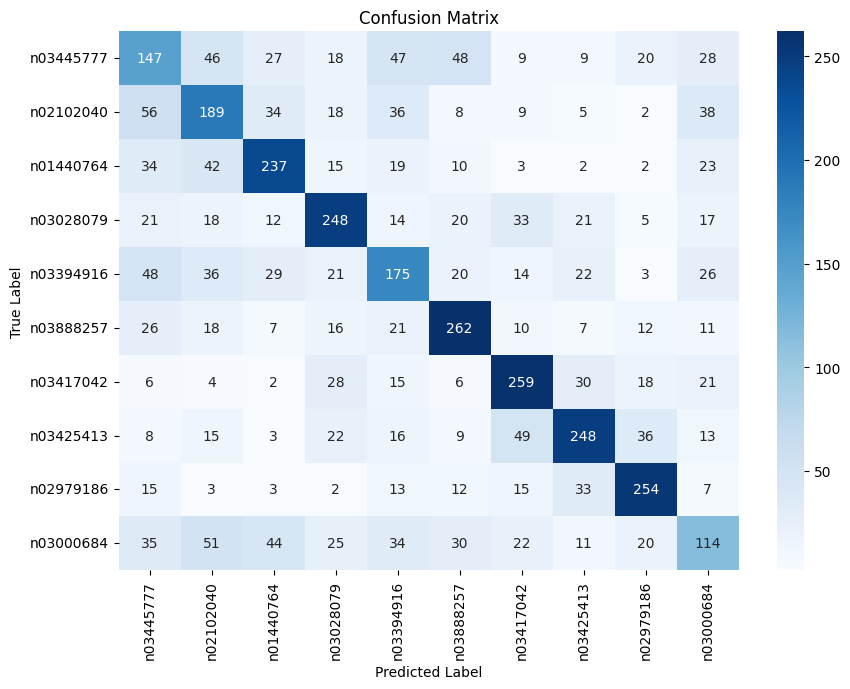

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.37      0.37       399
           1       0.45      0.48      0.46       395
           2       0.60      0.61      0.60       387
           3       0.60      0.61      0.60       409
           4       0.45      0.44      0.45       394
           5       0.62      0.67      0.64       390
           6       0.61      0.67      0.64       389
           7       0.64      0.59      0.61       419
           8       0.68      0.71      0.70       357
           9       0.38      0.30      0.33       386

    accuracy                           0.54      3925
   macro avg       0.54      0.54      0.54      3925
weighted avg       0.54      0.54      0.54      3925



In [ ]:
# svm hyperparam tuning. 35 minutes.
import os
import numpy as np
import cv2
from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# function to apply histogram of gradients (HOG)
def load_images_and_labels(image_dir):
    images = []
    labels = []
    label_map = {}

    for label, class_name in enumerate(os.listdir(image_dir)):
        class_dir = os.path.join(image_dir, class_name)
        if os.path.isdir(class_dir):
            label_map[label] = class_name
            for img_name in os.listdir(class_dir): # Preprocessing for HOG
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (64, 64))
                fd, _ = hog(img_resized, # Applying HOG
                            orientations=9,
                            pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2),
                            visualize=True)
                images.append(fd)
                labels.append(label)

    return np.array(images), np.array(labels), label_map

# Applying the HOG function to train and test images
X_train, y_train, label_map = load_images_and_labels(train_dir)
X_test, y_test, _ = load_images_and_labels(test_dir)

# Normalise the feature vectors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Label mapping:", label_map)

# Define the SVM model
svm = SVC()

# Define hyperparameter grid for gridsearch
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf']
}

# Grid search
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=2, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train final SVM model with best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Best Test Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.values(), yticklabels=label_map.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} - 18:57

Model: "le_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (1, 28, 28, 6)              │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (1, 10, 10, 16)             │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (1, 1, 1, 120)              │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (1, 120)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (1, 84)                     │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (1, 10)                     │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch 1, Loss: 2.0283594131469727, Accuracy: 27.24680519104004, Test Loss: 1.9882453680038452, Test Accuracy: 30.012739181518555
Epoch 2, Loss: 1.821255087852478, Accuracy: 37.07889175415039, Test Loss: 1.7970201969146729, Test Accuracy: 37.47770690917969
Epoch 3, Loss: 1.7258412837982178, Accuracy: 40.923011779785156, Test Loss: 1.73286771774292, Test Accuracy: 41.29936218261719
Epoch 4, Loss: 1.6265013217926025, Accuracy: 44.57704162597656, Test Loss: 1.6879417896270752, Test Accuracy: 42.70063781738281
Epoch 5, Loss: 1.5745280981063843, Accuracy: 46.58359146118164, Test Loss: 1.6664754152297974, Test Accuracy: 43.94904327392578
Epoch 6, Loss: 1.5070263147354126, Accuracy: 48.75910949707031, Test Loss: 1.5983531475067139, Test Accuracy: 45.5031852722168
Epoch 7, Loss: 1.4510142803192139, Accuracy: 50.51219940185547, Test Loss: 1.6201159954071045, Test Accuracy: 45.93630599975586
Epoch 8, Loss: 1.3952016830444336, Accuracy: 52.814449310302734, Test Loss: 1.594213843345642, Test Accura

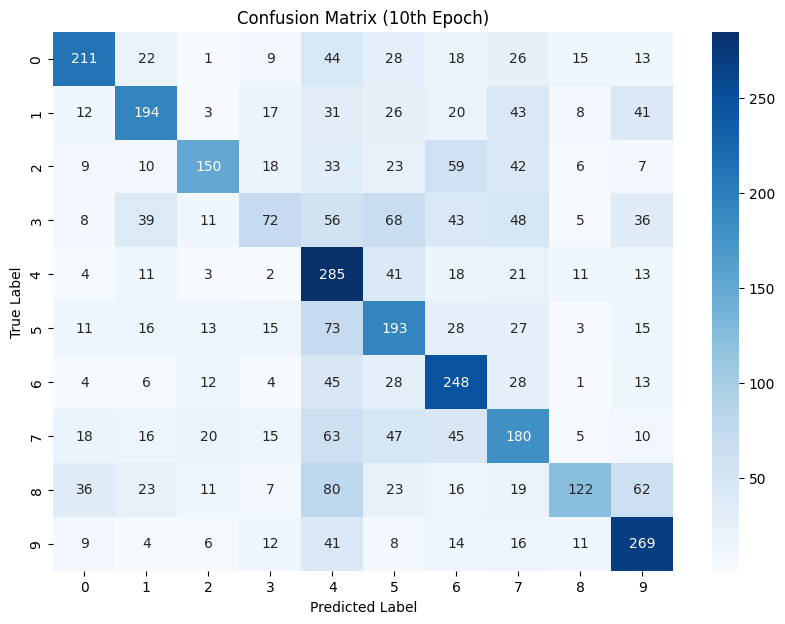

In [ ]:
# Lenet 1. 10 mins.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Preprocessing
def preprocess(image, label):
    image = tf.image.rgb_to_grayscale(image) # RGB (3 channels) to Greyscale (1)
    image = image / 255.0  # Normalise
    return image, label

IMG_SIZE = (28, 28)
train_dataset = image_dataset_from_directory(train_dir,shuffle=True,batch_size=32,image_size=IMG_SIZE)
test_dataset = image_dataset_from_directory(test_dir,shuffle=True,batch_size=32,image_size=IMG_SIZE)
train_dataset_lenet = train_dataset.map(preprocess)
test_dataset_lenet = test_dataset.map(preprocess)


# Define LeNet Model
class LeNet(keras.Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = layers.Conv2D(6, (5, 5), activation='relu', padding='same')  # 6 filters, 5x5 kernel
        self.pool1 = layers.MaxPooling2D(pool_size=(2, 2))  # Max Pooling
        self.conv2 = layers.Conv2D(16, (5, 5), activation='relu', padding='valid')  # 16 filters, 5x5 kernel
        self.pool2 = layers.MaxPooling2D(pool_size=(2, 2))  # Max Pooling
        self.conv3 = layers.Conv2D(120, (5, 5), activation='relu', padding='valid')  # 120 filters, 5x5 kernel
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(84, activation='relu')  # Fully Connected Layer
        self.dense2 = layers.Dense(10, activation='softmax')  # Output layer for our 10 classes

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)
# Function to evaluate the test accuracy
@tf.function
def test_step(images, labels):
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

# Create an instance of the model
model = LeNet()

# Build the model by calling it on a sample input
sample_input = tf.random.normal([1, 28, 28, 1])
model(sample_input)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

model.summary() # Table showing the structure of the model

# Train the model
EPOCHS = 10
for epoch in range(EPOCHS):
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()
    for images, labels in train_dataset_lenet:
        train_step(images, labels)
    for test_images, test_labels in test_dataset_lenet:
        test_step(test_images, test_labels)
    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
    )

    if epoch == 9:
        y_true = []
        y_pred = []

        for test_images, test_labels in test_dataset_lenet:
            preds = model.predict(test_images)
            y_true.extend(test_labels.numpy())  # True labels
            y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix (10th Epoch)")
        plt.show()
        print("Classification Report:")
        print(classification_report(y_true, y_pred))

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
Training with batch_size=16 and optimizer=Adam
Epoch 1, Loss: 2.0315, Accuracy: 27.14, Test Loss: 1.9034, Test Accuracy: 33.53
Epoch 2, Loss: 1.8203, Accuracy: 37.31, Test Loss: 1.7746, Test Accuracy: 38.65
Epoch 3, Loss: 1.7130, Accuracy: 41.27, Test Loss: 1.7183, Test Accuracy: 41.58
Epoch 4, Loss: 1.6202, Accuracy: 44.80, Test Loss: 1.6807, Test Accuracy: 42.62
Epoch 5, Loss: 1.5515, Accuracy: 47.66, Test Loss: 1.6305, Test Accuracy: 45.68
Epoch 6, Loss: 1.4946, Accuracy: 50.06, Test Loss: 1.5664, Test Accuracy: 47.11
Epoch 7, Loss: 1.4350, Accuracy: 51.97, Test Loss: 1.6158, Test Accuracy: 47.24
Epoch 8, Loss: 1.3812, Accuracy: 53.84, Test Loss: 1.5625, Test Accuracy: 47.75
Epoch 9, Loss: 1.3366, Accuracy: 54.96, Test Loss: 1.5257, Test Accuracy: 49.43
Epoch 10, Loss: 1.2974, Accuracy: 56.85, Test Loss: 1.5264, Test Accuracy: 49.02
Training with batch_size=16 and optimizer=SGD
Epoch 1, Loss: 2.2992,

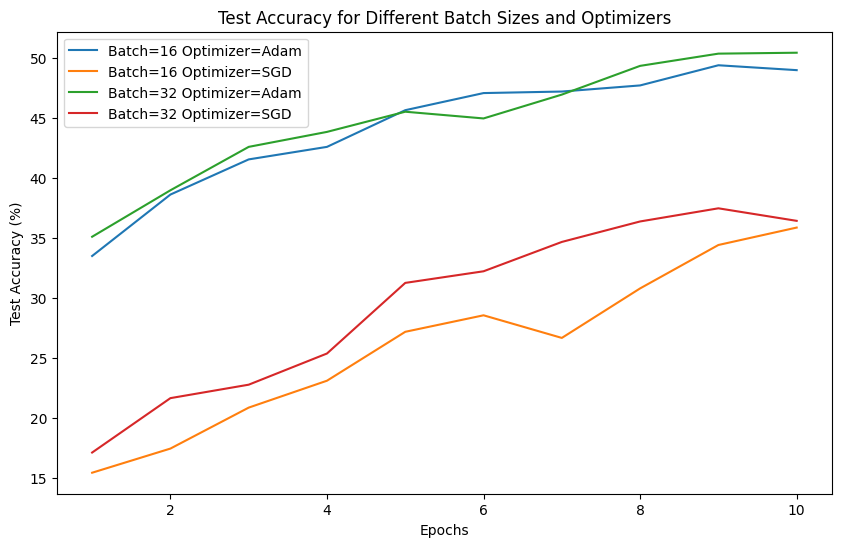

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

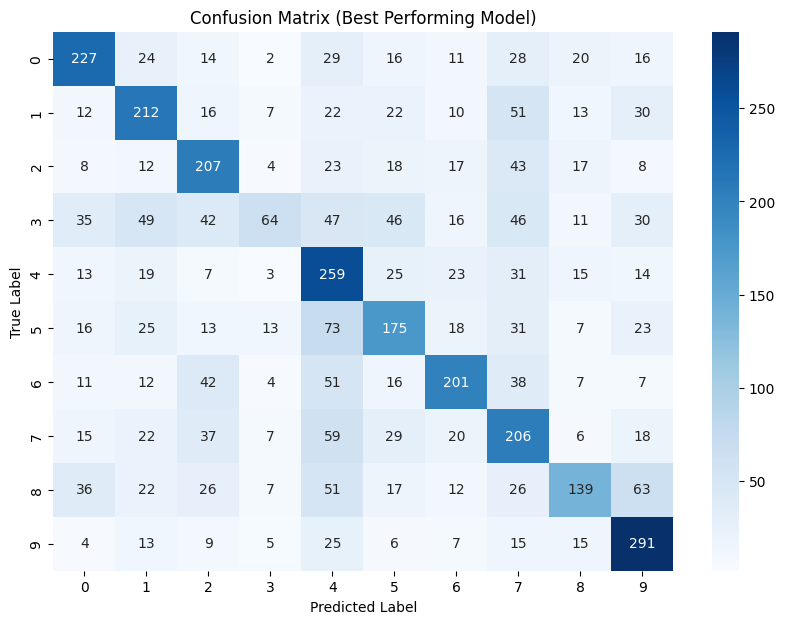

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       387
           1       0.52      0.54      0.53       395
           2       0.50      0.58      0.54       357
           3       0.55      0.17      0.25       386
           4       0.41      0.63      0.49       409
           5       0.47      0.44      0.46       394
           6       0.60      0.52      0.56       389
           7       0.40      0.49      0.44       419
           8       0.56      0.35      0.43       399
           9       0.58      0.75      0.65       390

    accuracy                           0.50      3925
   macro avg       0.52      0.50      0.49      3925
weighted avg       0.52      0.50      0.49      3925



In [ ]:
# Lenet 2, 4 models, 45 mins.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Preprocessing
def preprocess(image, label):
    image = tf.image.rgb_to_grayscale(image)  # RGB to Greyscale
    image = image / 255.0  # Normalise
    return image, label

IMG_SIZE = (28, 28)
train_dataset = image_dataset_from_directory(train_dir, shuffle=True, batch_size=32, image_size=IMG_SIZE)
test_dataset = image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=IMG_SIZE)
train_dataset_lenet = train_dataset.map(preprocess)
test_dataset_lenet = test_dataset.map(preprocess)

# Define LeNet Model
class LeNet(keras.Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = layers.Conv2D(6, (5, 5), activation='relu', padding='same')
        self.pool1 = layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = layers.Conv2D(16, (5, 5), activation='relu', padding='valid')
        self.pool2 = layers.MaxPooling2D(pool_size=(2, 2))
        self.conv3 = layers.Conv2D(120, (5, 5), activation='relu', padding='valid')
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(84, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

def train_step(images, labels, model, loss_object, optimizer, train_loss, train_accuracy):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        train_loss(loss)
        train_accuracy(labels, predictions)

def test_step(images, labels, model, loss_object, test_loss, test_accuracy):
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)
    test_loss(t_loss)
    test_accuracy(labels, predictions)

# Function to train and evaluate model
def train_and_evaluate_model(batch_size, optimizer_class):
    model = LeNet()
    optimizer = optimizer_class()  # Create a new optimizer instance
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])

    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
    test_loss = tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

    test_accuracies = []

    # Train the model
    EPOCHS = 10
    for epoch in range(EPOCHS):
        train_loss.reset_state()
        train_accuracy.reset_state()
        test_loss.reset_state()
        test_accuracy.reset_state()

        for images, labels in train_dataset_lenet:
            train_step(images, labels, model, loss_object, optimizer, train_loss, train_accuracy)

        for test_images, test_labels in test_dataset_lenet:
            test_step(test_images, test_labels, model, loss_object, test_loss, test_accuracy)

        print(f'Epoch {epoch + 1}, '
              f'Loss: {train_loss.result():.4f}, '
              f'Accuracy: {train_accuracy.result() * 100:.2f}, '
              f'Test Loss: {test_loss.result():.4f}, '
              f'Test Accuracy: {test_accuracy.result() * 100:.2f}')

        test_accuracies.append(test_accuracy.result().numpy() * 100)

    return test_accuracies, model

results = []

# Hyperparameters to try
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD]
batch_sizes = [16, 32]

# Run training for each combination of hyperparameters
for batch_size in batch_sizes:
    for optimizer_class in optimizers:
        print(f"Training with batch_size={batch_size} and optimizer={optimizer_class.__name__}")
        accuracies, model = train_and_evaluate_model(batch_size, optimizer_class)
        results.append({
            "batch_size": batch_size,
            "optimizer": optimizer_class.__name__,
            "accuracies": accuracies,
            "model": model
        })

# Plot the results of each model
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(range(1, 11), result['accuracies'], label=f"Batch={result['batch_size']} Optimizer={result['optimizer']}")

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy for Different Batch Sizes and Optimizers')
plt.legend()
plt.show()

# Find the best model by test accuracy
best_model = max(results, key=lambda x: max(x['accuracies']))
best_model_instance = best_model['model']

# Confusion matrix for the best model
y_true = []
y_pred = []
for test_images, test_labels in test_dataset_lenet:
    preds = best_model_instance.predict(test_images)
    y_true.extend(test_labels.numpy())  # True labels
    y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Best Performing Model)")
plt.show()

print("Classification Report for Best Model:")
print(classification_report(y_true, y_pred))


Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 105s 337ms/step - accuracy: 0.7668 - loss: 1.6280 - val_accuracy: 0.9180 - val_loss: 0.2963
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 107s 226ms/step - accuracy: 0.9497 - loss: 0.1709 - val_accuracy: 0.9302 - val_loss: 0.2617
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 83s 229ms/step - accuracy: 0.9751 - loss: 0.0806 - val_accuracy: 0.9338 - val_loss: 0.2426
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 85s 241ms/step - accuracy: 0.9890 - loss: 0.0415 - val_accuracy: 0.9396 - val_loss: 0.2567
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 82s 241ms/step - accuracy: 0.9950 - loss: 0.0199 - val_accuracy: 0.9338 - val_loss: 0.2941
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 82s 240ms/step - accuracy: 0.9909 - loss: 0.0332 - val_accuracy: 0.9409 - val_loss: 0.2435
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 82s 239ms/step - accuracy: 0.9970 - loss: 0.0116 - val_accuracy: 0.9404 - val_loss: 0.2570
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 82s 240ms/step - accuracy: 0.9976 - loss:

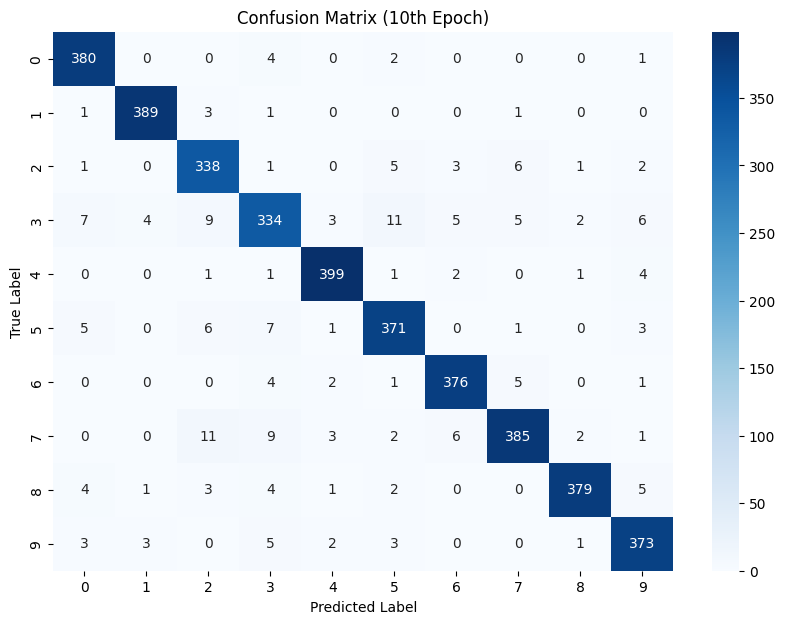

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       387
           1       0.98      0.98      0.98       395
           2       0.91      0.95      0.93       357
           3       0.90      0.87      0.88       386
           4       0.97      0.98      0.97       409
           5       0.93      0.94      0.94       394
           6       0.96      0.97      0.96       389
           7       0.96      0.92      0.94       419
           8       0.98      0.95      0.97       399
           9       0.94      0.96      0.95       390

    accuracy                           0.95      3925
   macro avg       0.95      0.95      0.95      3925
weighted avg       0.95      0.95      0.95      3925



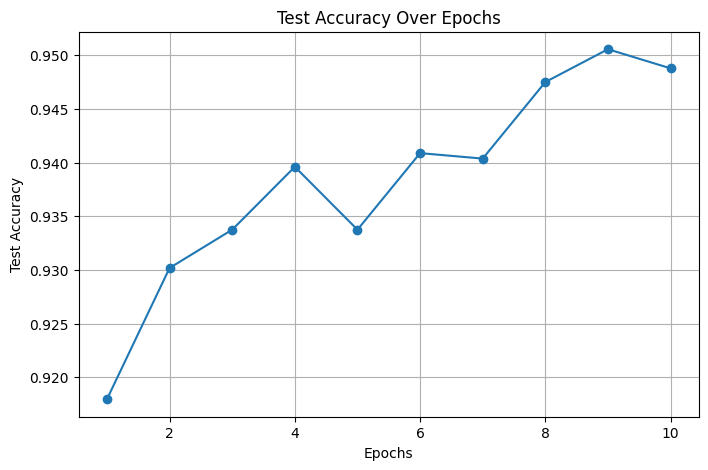

In [ ]:
# vgg 1. 15 mins.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

IMG_SIZE = (224, 224)  # VGG16 expects 224x224 images
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(train_dir,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              label_mode='int',
                                              shuffle=True)

test_dataset = image_dataset_from_directory(test_dir,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode='int')

# Load the pre-trained VGG16 model
vgg_base = VGG16(weights='imagenet',  # Use pre-trained weights from ImageNet
                 include_top=False,    # dont include the final fully connected layers as we make our own
                 input_shape=(224, 224, 3))  # RGB images with 224x224 resolution

# Freeze the layers in the base model
vgg_base.trainable = False

# Build the model with 2 of our own layers at the end.
model = models.Sequential([
    vgg_base,  # pre-trained VGG16 base
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dense(128, activation='relu'),  # fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (for our 10 classes)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
EPOCHS = 10
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
for epoch in range(EPOCHS):
  if epoch == 9:
        y_true = []
        y_pred = []

        for test_images, test_labels in test_dataset:
            preds = model.predict(test_images)
            y_true.extend(test_labels.numpy())  # True labels
            y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix (10th Epoch)")
        plt.show()
        print("Classification Report:")
        print(classification_report(y_true, y_pred))

# Plot test accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS + 1), history.history['val_accuracy'], marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.show()


Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9177 - loss: 0.2686

296/296 ━━━━━━━━━━━━━━━━━━━━ 94s 258ms/step - accuracy: 0.9178 - loss: 0.2681 - val_accuracy: 0.9834 - val_loss: 0.0465
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 117s 204ms/step - accuracy: 0.9909 - loss: 0.0267 - val_accuracy: 0.9873 - val_loss: 0.0472
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9977 - loss: 0.0083

296/296 ━━━━━━━━━━━━━━━━━━━━ 57s 192ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9898 - val_loss: 0.0324
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 84s 197ms/step - accuracy: 0.9961 - loss: 0.0146 - val_accuracy: 0.9901 - val_loss: 0.0380
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 88s 217ms/step - accuracy: 0.9963 - loss: 0.0099 - val_accuracy: 0.9890 - val_loss: 0.0511
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 54s 182ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9906 - val_loss: 0.0437
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 60s 201ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9926 - val_loss: 0.0390
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 81s 197ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.9888 - val_loss: 0.0597
Epoch 9/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 83s 201ms/step - accuracy: 0.9928 - loss: 0.0234 - val_accuracy: 0.9862 - val_loss: 0.0659
Epoch 10/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 55s 186ms/step - accuracy: 0.9953 - loss: 0.0159 - va

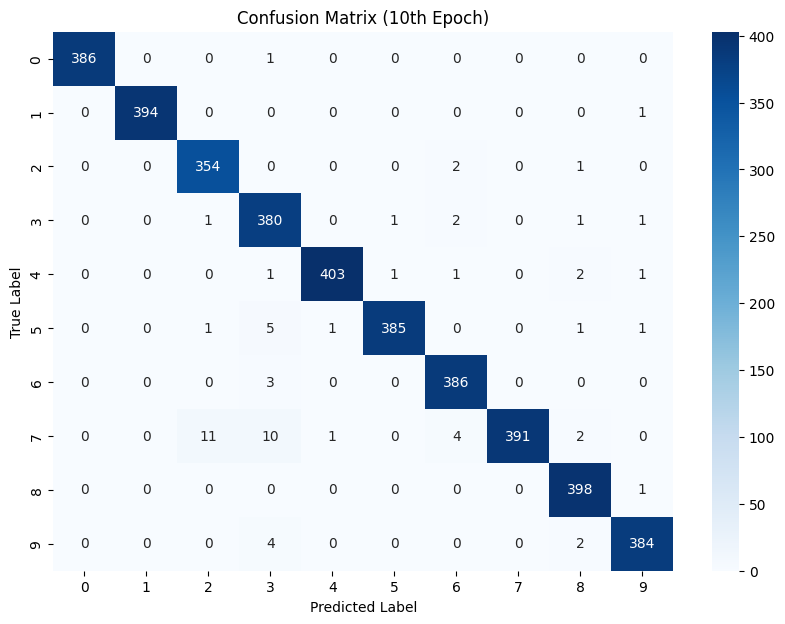

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       395
           2       0.96      0.99      0.98       357
           3       0.94      0.98      0.96       386
           4       1.00      0.99      0.99       409
           5       0.99      0.98      0.99       394
           6       0.98      0.99      0.98       389
           7       1.00      0.93      0.97       419
           8       0.98      1.00      0.99       399
           9       0.99      0.98      0.99       390

    accuracy                           0.98      3925
   macro avg       0.98      0.98      0.98      3925
weighted avg       0.98      0.98      0.98      3925



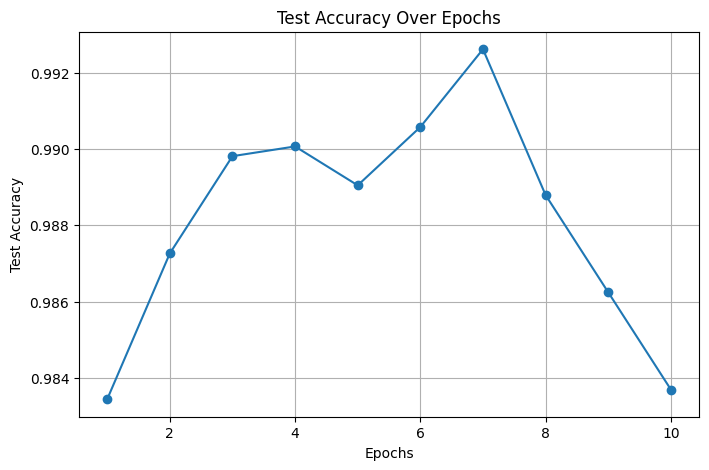

In [ ]:
# resnet. 15 mins.
# Accidentally re-ran this so the results here are slightly different to those
# shown in the report.
# Variation can occur as both sets of images are shuffled.
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # ResNet50 expects 224x224 images

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=False
)

# Preprocessing using predefined function for ResNet50
def preprocess(image, label):
    image = preprocess_input(tf.cast(image, tf.float32))
    return image, label

train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)


# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the base model
base_model.trainable = False

# Build the model with 2 of our own layers at the end.
model = models.Sequential([
    base_model,  # Base ResNet50 model
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer for our 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Saves the best model, in case colab GPU time runs out during training.
checkpoint = ModelCheckpoint('best_resnet_model.h5', save_best_only=True)

# Train the model
EPOCHS = 10
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset,
    callbacks=[checkpoint]
)

for epoch in range(EPOCHS):
  if epoch == 9:
        y_true = []
        y_pred = []

        for test_images, test_labels in test_dataset:
            preds = model.predict(test_images)
            y_true.extend(test_labels.numpy())  # True labels
            y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix (10th Epoch)")
        plt.show()
        print("Classification Report:")
        print(classification_report(y_true, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS + 1), history.history['val_accuracy'], marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 

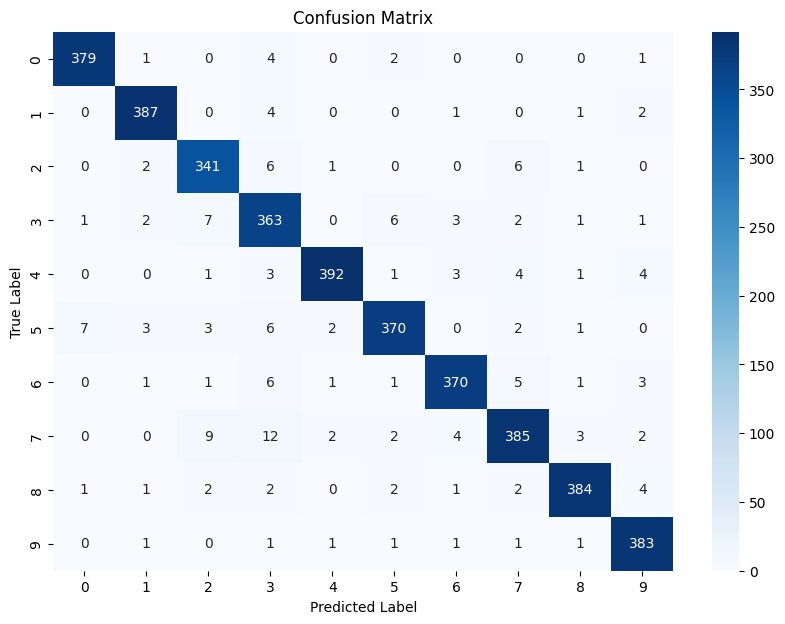

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       387
           1       0.97      0.98      0.98       395
           2       0.94      0.96      0.95       357
           3       0.89      0.94      0.92       386
           4       0.98      0.96      0.97       409
           5       0.96      0.94      0.95       394
           6       0.97      0.95      0.96       389
           7       0.95      0.92      0.93       419
           8       0.97      0.96      0.97       399
           9       0.96      0.98      0.97       390

    accuracy                           0.96      3925
   macro avg       0.96      0.96      0.96      3925
weighted avg       0.96      0.96      0.96      3925



In [ ]:
# This produces a confusion matrix and classification report for a saved model.
#
# This code was used after running out of the free gpu time in colab.
# The resnet model had not fully trained, but has since been fully trained.

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

model_path = '/content/drive/MyDrive/best_resnet_model.h5'

# Load the saved model
model = tf.keras.models.load_model(model_path)

# Prepare the true labels and predicted labels
y_true = []
y_pred = []

# Iterate through the test dataset and collect true labels and predictions
for test_images, test_labels in test_dataset:
    preds = model.predict(test_images)  # Get the predictions from the model
    y_true.extend(test_labels.numpy())  # True labels
    y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_true, y_pred))


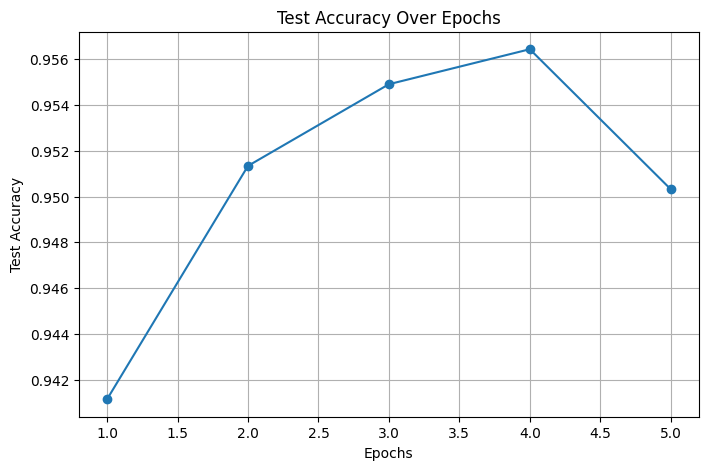

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS + 1), history.history['val_accuracy'], marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.show()

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 251s 796ms/step - accuracy: 0.7138 - loss: 1.4234 - val_accuracy: 0.9062 - val_loss: 0.3886
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 194s 656ms/step - accuracy: 0.8932 - loss: 0.3647 - val_accuracy: 0.9238 - val_loss: 0.3005
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 176s 593ms/step - accuracy: 0.9144 - loss: 0.2788 - val_accuracy: 0.9325 - val_loss: 0.2420
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 217s 645ms/step - accuracy: 0.9223 - loss: 0.2372 - val_accuracy: 0.9287 - val_loss: 0.2657
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 189s 637ms/step - accuracy: 0.9334 - loss: 0.2084 - val_accuracy: 0.9391 - val_loss: 0.2249
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 188s 635ms/step - accuracy: 0.9417 - loss: 0.1724 - val_accuracy: 0.9409 - val_loss: 0.2352
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 187s 584ms/step - accuracy: 0.9421 - loss: 0.1746 - val_accuracy: 0.9350 - val_loss: 0.2467
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 217s 638ms/step - accuracy: 0.9476 -

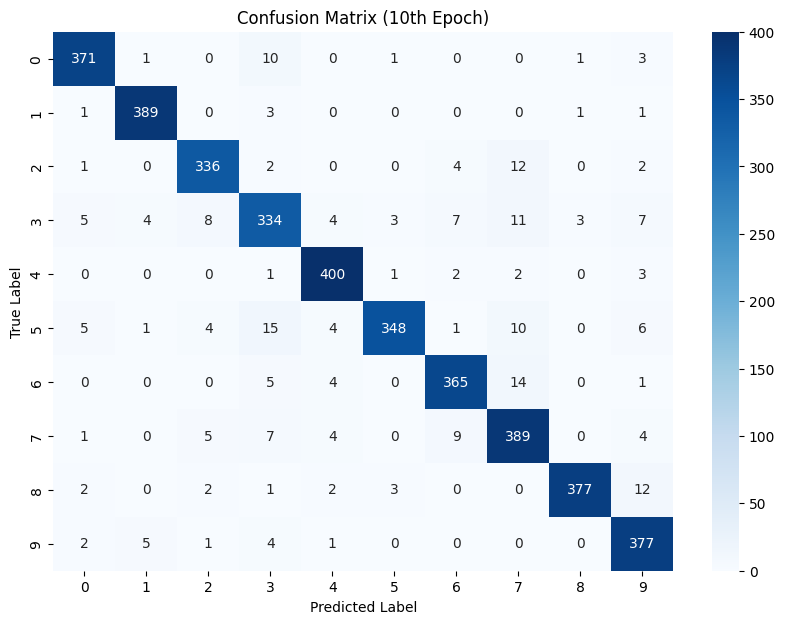

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       387
           1       0.97      0.98      0.98       395
           2       0.94      0.94      0.94       357
           3       0.87      0.87      0.87       386
           4       0.95      0.98      0.97       409
           5       0.98      0.88      0.93       394
           6       0.94      0.94      0.94       389
           7       0.89      0.93      0.91       419
           8       0.99      0.94      0.97       399
           9       0.91      0.97      0.94       390

    accuracy                           0.94      3925
   macro avg       0.94      0.94      0.94      3925
weighted avg       0.94      0.94      0.94      3925



In [ ]:
# vgg 2 - data augmentation.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

IMG_SIZE = (224, 224)  # VGG16 expects 224x224 images
BATCH_SIZE = 32

# Data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1)
])

train_dataset = image_dataset_from_directory(train_dir,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              label_mode='int',
                                              shuffle=True)
# Implementation of specified data augmentation
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

test_dataset = image_dataset_from_directory(test_dir,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode='int')

# Load the pre-trained VGG16 model (with RGB input)
vgg_base = VGG16(weights='imagenet',  # Use pre-trained weights from ImageNet
                 include_top=False,    # dont include the final fully connected layers
                 input_shape=(224, 224, 3))  # RGB images

# Freeze the layers in the base model
vgg_base.trainable = False

# Build the model with custom layers
model = models.Sequential([
    vgg_base,  #pre-trained VGG16 base
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dense(128, activation='relu'),  # fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
EPOCHS = 10
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
for epoch in range(EPOCHS):
  if epoch == 9:
        y_true = []
        y_pred = []

        for test_images, test_labels in test_dataset:
            preds = model.predict(test_images)
            y_true.extend(test_labels.numpy())  # True labels
            y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix (10th Epoch)")
        plt.show()
        print(classification_report(y_true, y_pred))

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 82s 270ms/step - accuracy: 0.8343 - loss: 0.8516 - val_accuracy: 0.9287 - val_loss: 0.2176
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 96s 321ms/step - accuracy: 0.9654 - loss: 0.1187 - val_accuracy: 0.9371 - val_loss: 0.2178
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 144s 327ms/step - accuracy: 0.9771 - loss: 0.0729 - val_accuracy: 0.9355 - val_loss: 0.2389
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 78s 263ms/step - accuracy: 0.9819 - loss: 0.0537 - val_accuracy: 0.9378 - val_loss: 0.2691
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 81s 260ms/step - accuracy: 0.9860 - loss: 0.0399 - val_accuracy: 0.9284 - val_loss: 0.3678
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 82s 259ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9136 - val_loss: 0.4757
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 95s 321ms/step - accuracy: 0.9817 - loss: 0.0592 - val_accuracy: 0.9434 - val_loss: 0.2848
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 144s 327ms/step - accuracy: 0.9916 - loss:

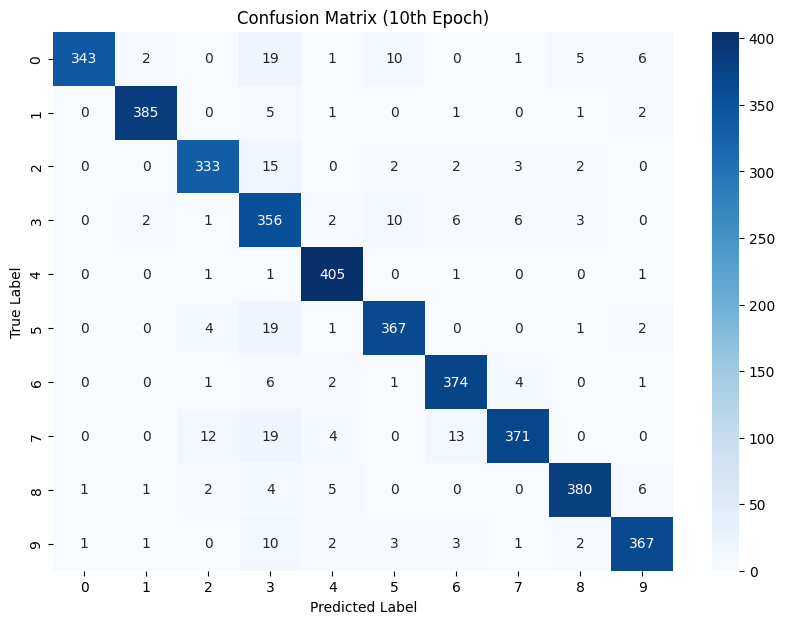

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       387
           1       0.98      0.97      0.98       395
           2       0.94      0.93      0.94       357
           3       0.78      0.92      0.85       386
           4       0.96      0.99      0.97       409
           5       0.93      0.93      0.93       394
           6       0.94      0.96      0.95       389
           7       0.96      0.89      0.92       419
           8       0.96      0.95      0.96       399
           9       0.95      0.94      0.95       390

    accuracy                           0.94      3925
   macro avg       0.94      0.94      0.94      3925
weighted avg       0.94      0.94      0.94      3925



In [ ]:
# vgg 3 - architecture change
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

IMG_SIZE = (224, 224)  # VGG16 expects 224x224 images
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(train_dir,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              label_mode='int',
                                              shuffle=True)

test_dataset = image_dataset_from_directory(test_dir,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode='int')

# Load the pre-trained VGG16 model (with RGB input)
vgg_base = VGG16(weights='imagenet',  # Use pre-trained weights from ImageNet
                 include_top=False,    # dont include the final fully connected layers
                 input_shape=(224, 224, 3))  # RGB images

# Freeze the layers in the base model
vgg_base.trainable = False

model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # Adding a new layer
    layers.Dense(256, activation='relu'),  # Add neurons to penultimate layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
EPOCHS = 10
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
for epoch in range(EPOCHS):
  if epoch == 9:
        y_true = []
        y_pred = []

        for test_images, test_labels in test_dataset:
            preds = model.predict(test_images)
            y_true.extend(test_labels.numpy())  # True labels
            y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix (10th Epoch)")
        plt.show()
        print(classification_report(y_true, y_pred))

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 81s 268ms/step - accuracy: 0.7567 - loss: 1.6476 - val_accuracy: 0.9241 - val_loss: 0.2754 - learning_rate: 0.0010
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 78s 258ms/step - accuracy: 0.9510 - loss: 0.1731 - val_accuracy: 0.9282 - val_loss: 0.2708 - learning_rate: 0.0010
Epoch 3/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 101s 322ms/step - accuracy: 0.9759 - loss: 0.0795 - val_accuracy: 0.9373 - val_loss: 0.2504 - learning_rate: 0.0010
Epoch 4/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 124s 261ms/step - accuracy: 0.9827 - loss: 0.0476 - val_accuracy: 0.9335 - val_loss: 0.2765 - learning_rate: 0.0010
Epoch 5/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 81s 259ms/step - accuracy: 0.9907 - loss: 0.0310 - val_accuracy: 0.9406 - val_loss: 0.2481 - learning_rate: 0.0010
Epoch 1/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 149s 457ms/step - accuracy: 0.9876 - loss: 0.0385 - val_accuracy: 0.9404 - val_loss: 0.2631 - learning_rate: 1.0000e-05
Epoch 2/5
296/296 ━━━━━━━━━━━━━━━━━━━━ 180s 421ms/step - accuracy: 0.

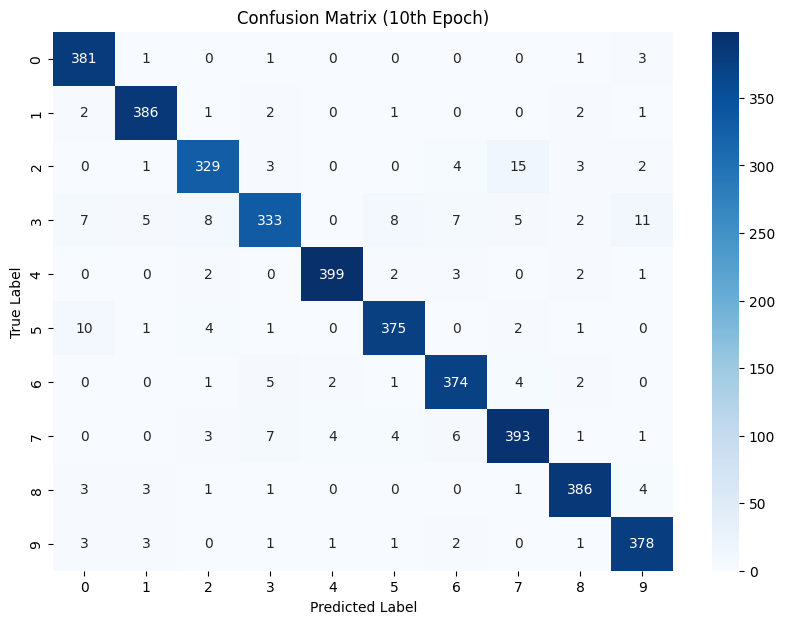

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       387
           1       0.96      0.98      0.97       395
           2       0.94      0.92      0.93       357
           3       0.94      0.86      0.90       386
           4       0.98      0.98      0.98       409
           5       0.96      0.95      0.95       394
           6       0.94      0.96      0.95       389
           7       0.94      0.94      0.94       419
           8       0.96      0.97      0.96       399
           9       0.94      0.97      0.96       390

    accuracy                           0.95      3925
   macro avg       0.95      0.95      0.95      3925
weighted avg       0.95      0.95      0.95      3925



In [ ]:
# vgg 5 - unfrozen layers.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

IMG_SIZE = (224, 224)  # VGG16 expects 224x224 images but takes too long
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(train_dir,
                                              image_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              label_mode='int',
                                              shuffle=True)

test_dataset = image_dataset_from_directory(test_dir,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode='int')

# Load the pre-trained VGG16 model (with RGB input)
vgg_base = VGG16(weights='imagenet',  # Use pre-trained weights from ImageNet
                 include_top=False,    # dont include the final fully connected layers
                 input_shape=(224, 224, 3))  # RGB images

# Freeze the layers in the base model (for now)
vgg_base.trainable = False

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
EPOCHS = 5
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=test_dataset, callbacks=callbacks)

# Unfreeze the last few layers of vgg
vgg_base.trainable = True
# Fine-tune from the 10th layer onwards
for layer in vgg_base.layers[:10]:
    layer.trainable = False

# Re-compile the model after unfreezing
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training the model
history_finetune = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
    callbacks=callbacks
)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
for epoch in range(EPOCHS):
  if epoch == 4:
        y_true = []
        y_pred = []

        for test_images, test_labels in test_dataset:
            preds = model.predict(test_images)
            y_true.extend(test_labels.numpy())  # True labels
            y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels

        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix (10th Epoch)")
        plt.show()
        print(classification_report(y_true, y_pred))

In [ ]:
# Used to view the layers inside of the VGG16 model.
for i, layer in enumerate(vgg_base.layers):
    print(i, layer.name, layer.__class__.__name__)